# Algorithmic Problems solved in Python
****
## About this notebook: 
Notebook prepared by **Jesus Perez Colino** Version 0.2, First Released: 25/11/2013, Alpha

- This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). This work is offered for free, with the hope that it will be useful.


- **Summary**: This notebook is a collection of traditional algorithmic problems for Python. Some of them are well-know in Computer Science (searching, sorting...), and other are more functional programming oriented or mathematically based. It includes examples of list comprenhension, map/reduce functions, generators, decorators, HPC simulations...


- **Acknowledge**: To create the current notebook, I have inserted many examples from many books, websites... some of them can be found in [Rosetta Code](http://rosettacode.org/wiki/Rosetta_Code), others in [stackoverflow](http://stackoverflow.com), and few of them I created by myself, for fun. It is not my intention to claim any property right... so just have fun, if you like this kind of stuff. 


- **Python & packages versions** to reproduce the results of this notebook: 

In [1]:
import IPython
import numpy as np
from sys import version 
print 'Reproducibility conditions for this notebook'.center(85,'-')
print 'Python version:     ' + version
print 'Numpy version:      ' + np.__version__
print 'IPython version:    ' + IPython.__version__
print '-'*85

---------------------Reproducibility conditions for this notebook--------------------
Python version:     2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version:      1.9.2
IPython version:    3.2.0
-------------------------------------------------------------------------------------


#Problem 1: the Sum of Some
Code a function that given three positive integers, **n, x, y** returns the **sum** of the integers **between 0 and n** (inclusive) that are multiples of **x** or **y** but not both.

For example: 

`foo(8,2,3) = 2 + 3 + 4 + 8 = 17`

In [2]:
def foo(n, x, y):
    return sum(filter(lambda i: bool(i%x == 0) ^ bool(i%y == 0) , range(n+1)))

In [3]:
foo(8,2,3)

17

In [4]:
# have a look and check it out, step by step: 
x = 2
y = 3
n = 8
print map(lambda i: i%x == 0, range(n+1))
print map(lambda i: i%y == 0, range(n+1))
print map(lambda i: i%x == 0 ^ i%y == 0, range(n+1))
print 
print map(lambda i: bool(i%x == 0) ^ bool(i%y == 0) , range(n+1))
print 
print filter(lambda i: bool(i%x == 0) ^ bool(i%y == 0) , range(n+1))
print
print sum(filter(lambda i: bool(i%x == 0) ^ bool(i%y == 0) , range(n+1)))

[True, False, True, False, True, False, True, False, True]
[True, False, False, True, False, False, True, False, False]
[True, False, False, False, False, False, True, False, False]

[False, False, True, True, True, False, False, False, True]

[2, 3, 4, 8]

17


In [5]:
# alternatively, using directly a list comprenhension: 

def foo(n, x, y):
    return sum([ i for i in range(1,n+1) if bool(i%x==0) ^ bool(i%y==0) ])

foo(8,2,3)

17

#Problem 2: Map / Reduce / Filter Problems

**2.1.** Code a function that produce the **Mean** of a list using reduce functions

In [6]:
l = xrange(1,10)
print reduce(lambda x, y: x+y ,l) / float(len(l))

5.0


In [7]:
def myMean(l):
    return reduce(lambda x, y: x + y, l) / float(len(l))

**2.2.** Code a function that produce the **Standard Deviation** of a list using map / reduce

In [8]:
def myStd(l):
    return reduce(lambda x,y : x + y , map(lambda x: (x-myMean(l))**2 , l))/float(len(l))

In [9]:
l = xrange(1,10)

print myMean(l)
print myStd(l)


5.0
6.66666666667


**2.3** Code a function using map/reduce that **sum the square of all interger until n**

In [6]:
def mySumSquare(n):
    return reduce(lambda x,y : x + y, map(lambda x : x*x, range(n+1)))

print mySumSquare(5)
print mySumSquare(5) == sum(map(lambda x: x*x, [1, 2, 3, 4, 5]))

55
True


**2.4.** Determining the **maximum** of a list of numerical values by using reduce:

In [10]:
mymax = lambda a,b: a if (a > b) else b
reduce(mymax, [47,11,42,102,13])

102

In [11]:
mylist = [47,11,42,102,13]
reduce(lambda a,b: a if (a > b) else b, mylist)

102

**2.5.** Obtain the nth **fibonacci number** using `reduce` in ONE line

In [12]:
fib = lambda n : reduce(lambda x , n : [ x[1] , x[0] + x[1] ], range(n) ,[0,1] )[0]

In [13]:
[fib(i) for i in range(11)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

**2.6.** Write a function called `myreduce` that produce exactly the same result that the function `reduce`

In [14]:
def myreduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        try:
            initializer = next(it)
        except StopIteration:
            raise TypeError('reduce() of empty sequence with no initial value')
    accum_value = initializer
    for x in it:
        accum_value = function(accum_value, x)
    return accum_value

In [15]:
myreduce(lambda x,y : x+y, [1,2,3,4,5], initializer=3)

18

In [16]:
reduce(lambda x,y : x+y, [1,2,3,4,5], 3)

18

#Problem 3: plural of a list
Make plural of the words in a list of strings

In [17]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
print map(lambda word:word + 's', wordsList)

['cats', 'elephants', 'rats', 'rats', 'cats']


#Problem 4: counting tokens
Counting the number in a list of words using map/reduce

In [18]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']

wordCount = map(lambda word : (str(word),1),wordsList)
print wordCount


[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]


In [19]:
counter = map(lambda x : x[1], wordCount)
print counter


[1, 1, 1, 1, 1]


In [20]:
print 'Total Number of words:', reduce(lambda x,y : x+y, counter)
    

Total Number of words: 5


In [21]:
# All together: 

wordCount = map(lambda word : (str(word),1),wordsList)
counter = map(lambda x : x[1], wordCount)
print 'Total Number of words:', reduce(lambda x,y : x+y, counter)

Total Number of words: 5


# Problem 5 

Simplify the following expression using list comprehension:

In [22]:
i = 0
seq = ["one", "two", "three"]
for element in seq:
    seq[i] = '%d: %s' % (i, seq[i])
    i += 1
    
print seq

['0: one', '1: two', '2: three']


In [23]:
def _tuple(pos, element):
    return '%d: %s' % (pos, element)

seq = ["one", "two", "three"]
[_tuple(i, element) for i, element in enumerate(seq)]

['0: one', '1: two', '2: three']

# Problem 6

**islice** returns an iterator that works over a subgroup of a sequence. 

Build a function that reads the lines in a standard input, and yields the elements of each line starting from the fifth one, as long as the line has more than four elements

In [24]:
import itertools
def starting_at_five():
    value = raw_input().strip()
    while value != '':
        for el in itertools.islice(value.split(), 4, None):
            yield el
        value = raw_input().strip()

In [25]:
iter = starting_at_five()
iter.next()

1 2 3 4 5 6 7 8 9 


'5'

In [26]:
iter.next()

'6'

In [27]:
iter.next()

'7'

In [28]:
iter.next()

'8'

# Problem 7

Write a function that is able to group the duplicate elements from an iterator, as long as they are adjacent. A function can be given to the function for it to compare the elements. Otherwise, the identity comparison is used.

For example:

`get uuuuuuuuuuuuuuuuuup`

will be replaced by:

`1g1e1t1 8u1p`

In [29]:
from itertools import groupby

def compress(data):
    return ((len(list(group)), name)
             for name, group in groupby(data))

def decompress(data):
    return (car * size for size, car in data)


In [30]:
print list(compress('get uuuuuuuuuuuuuuuuuup'))

[(1, 'g'), (1, 'e'), (1, 't'), (1, ' '), (18, 'u'), (1, 'p')]


In [31]:
compressed = compress('get uuuuuuuuuuuuuuuuuup')
''.join(decompress(compressed))

'get uuuuuuuuuuuuuuuuuup'

#Problem 8: The Quine Problem

A Quine is a self-referential program that can, without any external access, output its own source. 

It is named after the philosopher and logician who studied self-reference and quoting in natural language, as for example in the paradox "'Yields falsehood when preceded by its quotation' yields falsehood when preceded by its quotation."

"Source" has one of two meanings. It can refer to the text-based program source. For languages in which program source is represented as a data structure, "source" may refer to the data structure: quines in these languages fall into two categories: programs which print a textual representation of themselves, or expressions which evaluate to a data structure which is equivalent to that expression.

The usual way to code a Quine works similarly to this paradox: The program consists of two identical parts, once as plain code and once quoted in some way (for example, as a character string, or a literal data structure). The plain code then accesses the quoted code and prints it out twice, once unquoted and once with the proper quotation marks added. Often, the plain code and the quoted code have to be nested.

**Write a program that outputs its own source code in this way.** If the language allows it, you may add a variant that accesses the code directly. You are not allowed to read any external files with the source code. The program should also contain some sort of self-reference, so constant expressions which return their own value which some top-level interpreter will print out. Empty programs producing no output are not allowed.

Python's `%r` format conversion uses the `repr()` function to return a string containing the source code representation of its argument:

In [32]:
x = 'x = %r\nprint(x %% x)'
print(x % x)

x = 'x = %r\nprint(x %% x)'
print(x % x)


In [33]:
x = 'x = {!r};print(x.format(x))'
print(x.format(x))

x = 'x = {!r};print(x.format(x))';print(x.format(x))


In [34]:
# notice the trick: 

x = 'x = {!r}';print x.format(x)

x = 'x = {!r}'


#Problem 9 

A narcissist (or Narcissus program) is the decision-problem version of a quine.
A quine, when run, takes no input, but produces a copy of its own source code at its output. In contrast, a narcissist reads a string of symbols from its input, and produces no output except a "1" or "accept" if that string matches its own source code, or a "0" or "reject" if it does not.

For concreteness, in this task we shall assume that symbol = character. The narcissist should be able to cope with any finite input, whatever its length. Any form of output is allowed, as long as the program always halts, and "accept", "reject" and "not yet finished" are distinguishable.

In [35]:
# TODO
import sys
with open(sys.argv[0]) as quine:
    code = raw_input("Enter source code: ")
    if code == quine.read():
        print("Accept")
    else:
        print("Reject")
 

Enter source code: x = 'x = %r\nprint(x %% x)'; print(x % x)
Reject


#Problem 10: Comparing Strings

The task is to demonstrate how to compare two strings from within the language and how to achieve a lexical comparison.
The task should demonstrate:
- Comparing two strings for exact equality
- Comparing two strings for inequality (i.e., the inverse of exact equality)
- Comparing two strings to see if one is lexically ordered before than the other
- Comparing two strings to see if one is lexically ordered after than the other
- How to achieve both case sensitive comparisons and case insensitive comparisons within the language
- How the language handles comparison of numeric strings if these are not treated lexically

Demonstrate any other kinds of string comparisons that the language provides, particularly as it relates to your type system. For example, you might demonstrate the difference between generic/polymorphic comparison and coercive/allomorphic comparison if your language supports such a distinction.

Here "generic/polymorphic" comparison means that the function or operator you're using doesn't always do string comparison, but bends the actual semantics of the comparison depending on the types one or both arguments; with such an operator, you achieve string comparison only if the arguments are sufficiently string-like in type or appearance.

In contrast, a "coercive/allomorphic" comparison function or operator has fixed string-comparison semantics regardless of the argument type; instead of the operator bending, it's the arguments that are forced to bend instead and behave like strings if they can, and the operator simply fails if the arguments cannot be viewed somehow as strings. A language may have one or both of these kinds of operators; see the Perl 6 entry for an example of a language with both kinds of operators.

In [36]:
def compare(a, b):
    print("\n%r is of type %r and %r is of type %r"
          % (a, type(a), b, type(b)))
    if a <  b:      print('%r is strictly less than  %r' % (a, b))
    if a <= b:      print('%r is less than or equal to %r' % (a, b))
    if a >  b:      print('%r is strictly greater than  %r' % (a, b))
    if a >= b:      print('%r is greater than or equal to %r' % (a, b))
    if a == b:      print('%r is equal to %r' % (a, b))
    if a != b:      print('%r is not equal to %r' % (a, b))
    if a is b:      print('%r has object identity with %r' % (a, b))
    if a is not b:  print('%r has negated object identity with %r' % (a, b))
 
compare('YUP', 'YUP')
compare('BALL', 'BELL')
compare('24', '123')
compare(24, 123)
compare(5.0, 5)


'YUP' is of type <type 'str'> and 'YUP' is of type <type 'str'>
'YUP' is less than or equal to 'YUP'
'YUP' is greater than or equal to 'YUP'
'YUP' is equal to 'YUP'
'YUP' has object identity with 'YUP'

'BALL' is of type <type 'str'> and 'BELL' is of type <type 'str'>
'BALL' is strictly less than  'BELL'
'BALL' is less than or equal to 'BELL'
'BALL' is not equal to 'BELL'
'BALL' has negated object identity with 'BELL'

'24' is of type <type 'str'> and '123' is of type <type 'str'>
'24' is strictly greater than  '123'
'24' is greater than or equal to '123'
'24' is not equal to '123'
'24' has negated object identity with '123'

24 is of type <type 'int'> and 123 is of type <type 'int'>
24 is strictly less than  123
24 is less than or equal to 123
24 is not equal to 123
24 has negated object identity with 123

5.0 is of type <type 'float'> and 5 is of type <type 'int'>
5.0 is less than or equal to 5
5.0 is greater than or equal to 5
5.0 is equal to 5
5.0 has negated object identity with 

#Problem 11: A stateful Standard Deviation

Write a **stateful function, class, generator or coroutine** that takes a series of floating point numbers, one at a time, and **returns the running standard deviation of the series**. The task implementation should use the most natural programming style of those listed for the function in the implementation language; the task must state which is being used. 

In [37]:
def sd(x):
    sd.sum  += x
    sd.sum2 += x*x
    sd.n    += 1.0
    sum, sum2, n = sd.sum, sd.sum2, sd.n
    return (sum2/n - (sum/n)**2)**0.5

In [38]:
sd.sum = sd.sum2 = sd.n = 0
for value in (2,4,4,4,5,5,7,9):
    print (value, sd(value))

(2, 0.0)
(4, 1.0)
(4, 0.9428090415820626)
(4, 0.8660254037844386)
(5, 0.9797958971132716)
(5, 1.0)
(7, 1.3997084244475297)
(9, 2.0)


In [39]:
# Using a class instance

class SD(object): # Plain () for python 3.x
    def __init__(self):
        self.sum, self.sum2, self.n = (0,0,0)
    def sd(self, x):
        self.sum  += x
        self.sum2 += x*x
        self.n    += 1.0
        sum, sum2, n = self.sum, self.sum2, self.n
        return (sum2/n - (sum/n)**2)**0.5

In [40]:
sd_inst = SD()
for value in (2,4,4,4,5,5,7,9):
    print (value, sd_inst.sd(value))

(2, 0.0)
(4, 1.0)
(4, 0.9428090415820626)
(4, 0.8660254037844386)
(5, 0.9797958971132716)
(5, 1.0)
(7, 1.3997084244475297)
(9, 2.0)


In [41]:
# Using an extended generator

def sdcreator():
    sum = sum2 = n = 0
    while True:
        x = yield (sum2/n - (sum/n)**2)**.5 if n else None
        sum  += x
        sum2 += x*x
        n    += 1.0

In [42]:
sd = sdcreator()
sd.send(None)
for value in (2,4,4,4,5,5,7,9):
    print (value, sd.send(value))

(2, 0.0)
(4, 1.0)
(4, 0.9428090415820626)
(4, 0.8660254037844386)
(5, 0.9797958971132716)
(5, 1.0)
(7, 1.3997084244475297)
(9, 2.0)


#Problem 12: A Linear Congruential Generator of Random Numbers

The **linear congruential generator** is a very simple example (and also a bad example) of a **random number generator**. All linear congruential generators use this formula:

$$r_{n + 1} = a \times r_n + c \pmod m$$



Where:

* $r_0$ is a seed.
* $r_1$, $r_2$, $r_3$, ..., are the random numbers.
* $a$, $c$, $m$ are constants.

If one chooses the values of $a$, $c$ and $m$ with care, then the generator produces a uniform distribution of integers from $0$ to $m - 1$.

LCG numbers have poor quality. $r_n$ and $r_{n + 1}$ are not independent, as true random numbers would be. Anyone who knows $r_n$ can predict $r_{n + 1}$, therefore LCG is not cryptographically secure. The LCG is still good enough for simple tasks like [[Miller-Rabin primality test]], or [[deal cards for FreeCell|FreeCell deals]]. Among the benefits of the LCG, one can easily reproduce a sequence of numbers, from the same $r_0$. One can also reproduce such sequence with a different programming language, because the formula is so simple.

The task is to replicate two historic random number generators. One is the `rand()` function from **BSD libc**, and the other is the `rand()` function from the **Microsoft C Runtime (MSCVRT.DLL)**. Each replica must yield the same sequence of integers as the original generator, when starting from the same seed.

In these formulas, the seed becomes $state_0$. The random sequence is $rand_1$, $rand_2$ and so on.

BSD formula:

* $state_{n + 1} = 1103515245 \times state_n + 12345 \pmod{2^{31}}$
* $rand_n = state_n$
* $rand_n$ is in range 0 to 2147483647.

Microsoft formula:

* $state_{n + 1} = 214013 \times state_n + 2531011 \pmod{2^{31}}$
* $rand_n = state_n \div 2^{16}$
* $rand_n$ is in range 0 to 32767

In [43]:
# notice that we are using a closure: 

def bsd_rand(seed):
    def rand():
        rand.seed = (1103515245*rand.seed + 12345) & 0x7fffffff
        return rand.seed
    rand.seed = seed
    return rand
 
def msvcrt_rand(seed):
    def rand():
        rand.seed = (214013*rand.seed + 2531011) & 0x7fffffff
        return rand.seed >> 16
    rand.seed = seed
    return rand

In [44]:
rand_bsd = bsd_rand(0)
print [rand_bsd() for i in range(10)]

[12345, 1406932606, 654583775, 1449466924, 229283573, 1109335178, 1051550459, 1293799192, 794471793, 551188310]


In [45]:
rand_msft = msvcrt_rand(0)
print [{i:rand_msft()} for i in range(9)]

[{0: 38}, {1: 7719}, {2: 21238}, {3: 2437}, {4: 8855}, {5: 11797}, {6: 8365}, {7: 32285}, {8: 10450}]


# Problem 13: A Dict of letters

Build a dictionary with all the letters of alphabet enumerated

In [46]:
{i:chr(65+i) for i in range(26)}

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

#Problem 14: Factorial function in functional form

Usually there is two different styles for the implementation of a factorial fuction: first, recursive and second, iterative. **Write the factorial function in a FUNTIONAL FORM**

In [47]:
def factorialR(N):
    "Recursive factorial function"
    assert isinstance(N, int) and N >= 1 
    return 1 if N <= 1 else N * factorialR(N-1)

def factorialI(N):
    "Iterative factorial function" 
    assert isinstance(N, int) and N >= 1 
    product = 1
    while N >= 1:
        product *= N
        N-=1 
    return product

In [48]:
%time factorialR(100)
%time factorialI(100)

CPU times: user 57 µs, sys: 43 µs, total: 100 µs
Wall time: 86.1 µs
CPU times: user 20 µs, sys: 7 µs, total: 27 µs
Wall time: 24.8 µs


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000L

**Factorial function in a FUNTIONAL FORM:**

In [49]:
%time reduce(lambda x,y:x*y, range(1,101), 1)

CPU times: user 24 µs, sys: 5 µs, total: 29 µs
Wall time: 27.9 µs


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000L

In [50]:
# or alternatively: 

from operator import mul 
def factorialHOF(n):
    return reduce(mul, range(1, n+1), 1)

In [51]:
%time factorialHOF(100)

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 21 µs


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000L

#Problem 15: Quicksort of a list

Write in a recursive way the quicksort algorithm for a list of numbers

In [52]:
def quicksort(lst):
    "Quicksort over a list-like sequence" 
    if len(lst) == 0:
        return lst 
    pivot = lst[0]
    pivots=[x for x in lst if x==pivot]
    small = quicksort([x for x in lst if x < pivot]) 
    large = quicksort([x for x in lst if x > pivot]) 
    return small + pivots + large

In [53]:
from numpy.random import randn
x = list(randn(10))
print x

[0.65929156751013385, -1.5108355083499576, -0.77391155894222119, 2.1230386824778988, -1.632787582221124, -0.26306116205918623, 0.00024887102760674053, 1.2149482849162871, 0.83910562520002374, 0.69018482173631734]


In [54]:
print x 
print 
print quicksort(x)

[0.65929156751013385, -1.5108355083499576, -0.77391155894222119, 2.1230386824778988, -1.632787582221124, -0.26306116205918623, 0.00024887102760674053, 1.2149482849162871, 0.83910562520002374, 0.69018482173631734]

[-1.632787582221124, -1.5108355083499576, -0.77391155894222119, -0.26306116205918623, 0.00024887102760674053, 0.65929156751013385, 0.69018482173631734, 0.83910562520002374, 1.2149482849162871, 2.1230386824778988]


#Problem 16: Memoizing decorator in Fibonacci generator

In [55]:
from functools import wraps

In [56]:
def memo(func):
    cache = {}
    @wraps(func)
    def wrap(*args):
        if args not in cache:
            cache[args]=func(*args)
        return cache[args]
    return wrap

In [57]:
@memo
def fibonacci(i):
    if i < 2 : return 1
    return fibonacci(i-1) + fibonacci(i-2)

In [58]:
fibonacci(10)

89

In [59]:
[fibonacci(i) for i in xrange(2,11)]

[2, 3, 5, 8, 13, 21, 34, 55, 89]

#Problem 17: Estimate $\pi$ by simulation

Compute $\pi$ by taking random numbers as x and y coordinates, and counting how many of them were in the unit circle

In [60]:
npts = 500000
xs = 2 * np.random.rand(npts) - 1
ys = 2 * np.random.rand(npts) - 1
r = xs**2 + ys**2
ninside = (r<1).sum()
print 'The aproximation to pi with {simul} simulation is {pi}'.format(simul = npts, pi=4*ninside/float(npts))

The aproximation to pi with 500000 simulation is 3.140096


# Problem 18: Fast sorting by arguments in Numpy
 
 Sort in descending order a numpy array using `argsort`

In [61]:
import numpy as np

x = np.array([7, 5, 4, 8, 150, 9, 0])
inds = np.argsort(x)
x_descending = x[inds[::-1]]
x_ascending = x[inds]
print 'original array: \n', x
print 
print 'index of the element of x in descending order: \n', inds
print 
print 'np.array ordering in descending order:\n', x_descending
print
print 'np.array ordering in ascending order:\n', x_ascending

original array: 
[  7   5   4   8 150   9   0]

index of the element of x in descending order: 
[6 2 1 0 3 5 4]

np.array ordering in descending order:
[150   9   8   7   5   4   0]

np.array ordering in ascending order:
[  0   4   5   7   8   9 150]


#Problem 19: Multivariate Simulation and Covariance Matrix estimation

In [62]:
import numpy as np

random_numbers = 100
means = np.array([50, 50, 50])
corr1_2 = 0.9 
corr1_3 = 0.7
corr2_3 = 0.1
sigma1 = 5
sigma2 = 20
sigma3 = 20

covariance_matrix = np.array([[sigma1 ** 2, corr1_2 * sigma1 * sigma2, corr1_3 * sigma1 * sigma3],
             [corr1_2 * sigma1 * sigma2, sigma2 ** 2, corr2_3 * sigma2 * sigma3],
             [corr1_3 * sigma1 * sigma3, corr2_3 * sigma2 * sigma3, sigma3 ** 2]])

np.random.seed(142)

multivariate_simul = np.random.multivariate_normal(means, covariance_matrix, random_numbers)

print 'Parameter for the simulation: \n',covariance_matrix
print 'Estimation over simulation: \n',np.cov(multivariate_simul.T)


Parameter for the simulation: 
[[  25.   90.   70.]
 [  90.  400.   40.]
 [  70.   40.  400.]]
Estimation over simulation: 
[[  37.66314611  108.64695711   99.09423481]
 [ 108.64695711  440.41430016  113.17124305]
 [  99.09423481  113.17124305  495.53016035]]


/Users/JPC/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: covariance is not positive-semidefinite.


In [63]:
# Calculating the means using a list comprenhension

means_estimated =[np.mean(multivariate_simul[:,i]) for i in range(multivariate_simul.shape[1])] 
print 'Means by columns:', means_estimated
var_estimated =[np.var(multivariate_simul[:,i]) for i in range(multivariate_simul.shape[1])]
print 'Var by columns:', var_estimated

Means by columns: [49.415315565933049, 46.679176632042278, 50.683705762438315]
Var by columns: [37.286514648374151, 436.01015715630041, 490.57485874240513]


In [64]:
#TODO

multivariate_simul_centered = np.matrix([map(lambda x : (x - means_estimated[i]), multivariate_simul[:,i]) 
                                       for i in range(multivariate_simul.shape[1])]).T


In [65]:
covMatrix = sum(map(lambda x : np.outer(x.T,x), multivariate_simul_centered))/float(multivariate_simul.size-1)
print covMatrix

#covMatrix = reduce(lambda x, y : x + y , covMatrix)/float(multivariate_simul.size-1)

# TODO

[[  12.47040624   35.9734072    32.81046571]
 [  35.9734072   145.82279504   37.47141492]
 [  32.81046571   37.47141492  164.07185911]]


#Problem 20: Inverting a dictionary: 1. using zip and 2. using a comprehension

In [66]:
m = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
m.items()

[('a', 1), ('c', 3), ('b', 2), ('d', 4)]

In [67]:
zip(m.values(), m.keys())

[(1, 'a'), (3, 'c'), (2, 'b'), (4, 'd')]

In [68]:
m_inverted_1 = dict(zip(m.values(), m.keys()))
m_inverted_1

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [69]:
m_inverted_2 = {value: key for key, value in m.items()}
print m_inverted_2 

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}


#Problem 21: Generator expressions

In [70]:
# A quite compact 'pythonic' generator expression example:

g = (x ** 2 for x in range(10))

for n in g:
    print '"Lazy" result: ', n

"Lazy" result:  0
"Lazy" result:  1
"Lazy" result:  4
"Lazy" result:  9
"Lazy" result:  16
"Lazy" result:  25
"Lazy" result:  36
"Lazy" result:  49
"Lazy" result:  64
"Lazy" result:  81


In [71]:
# Equivalent to the previous snippet, but more 'verbose':

def myg(stop): 
    z = 0
    while z < stop:
        yield z**2
        z+=1
        
g = myg(10)
for n in g:
    print '"Lazy" result: ', n

"Lazy" result:  0
"Lazy" result:  1
"Lazy" result:  4
"Lazy" result:  9
"Lazy" result:  16
"Lazy" result:  25
"Lazy" result:  36
"Lazy" result:  49
"Lazy" result:  64
"Lazy" result:  81


#Problem 22: Inheriting from named tuples (`collections.namedtuple`)

Define a new object (a named tuple) called `Point` using `collections.namedtuple` and build a method to sum the components of two `points`

In [72]:
import collections

Point = collections.namedtuple('Point', ['x', 'y'])

In [73]:
p = Point(x=1.0, y=2.0)
print p, p.x, p.y

Point(x=1.0, y=2.0) 1.0 2.0


In [74]:
class Point(collections.namedtuple('PointBase', ['x', 'y'])):
        __slots__ = ()
        def __add__(self, other):
                return Point(x=self.x + other.x, y=self.y + other.y)

In [75]:
p = Point(x=1.0, y=2.0)
q = Point(x=2.0, y=3.0)
print p + q

PointBase(x=3.0, y=5.0)


#Problem 23: Double-ended queue with maximum length (`collections.deque`)

In [76]:
Q = collections.deque()

In [77]:
Q.append(1)
Q.appendleft(2)
Q.extend([3, 4])
Q.extendleft([5, 6])
Q

deque([6, 5, 2, 1, 3, 4])

In [78]:
last_three = collections.deque(maxlen=3)
for i in xrange(10):
    last_three.append(i)
    print ', '.join(str(x) for x in last_three)

0
0, 1
0, 1, 2
1, 2, 3
2, 3, 4
3, 4, 5
4, 5, 6
5, 6, 7
6, 7, 8
7, 8, 9


#Problem 24: Using default dictionaries to represent simple trees

In [79]:
import json
tree = lambda: collections.defaultdict(tree)
root = tree()
root['menu']['id'] = 'file'
root['menu']['value'] = 'File'
root['menu']['menuitems']['new']['value'] = 'New'
root['menu']['menuitems']['new']['onclick'] = 'new();'
root['menu']['menuitems']['open']['value'] = 'Open'
root['menu']['menuitems']['open']['onclick'] = 'open();'
root['menu']['menuitems']['close']['value'] = 'Close'
root['menu']['menuitems']['close']['onclick'] = 'close();'
print json.dumps(root, sort_keys=True, indent=4, separators=(',', ': '))

{
    "menu": {
        "id": "file",
        "menuitems": {
            "close": {
                "onclick": "close();",
                "value": "Close"
            },
            "new": {
                "onclick": "new();",
                "value": "New"
            },
            "open": {
                "onclick": "open();",
                "value": "Open"
            }
        },
        "value": "File"
    }
}


#Problem 25: Cartesian products (`itertools.product`)

In [80]:
import itertools

for p in itertools.product([1, 2, 3], [4, 5]):
    print p

(1, 4)
(1, 5)
(2, 4)
(2, 5)
(3, 4)
(3, 5)


In [81]:
for p in itertools.product([0, 1], repeat=4):
    print ''.join(str(x) for x in p)

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


#Problem 26: All the methods to **Flattening** a list

In [82]:
a = [[1, 2], [3, 4], [5, 6]]

In [83]:
sum(a, [])

[1, 2, 3, 4, 5, 6]

In [84]:
[x for l in a for x in l]

[1, 2, 3, 4, 5, 6]

In [85]:
list(itertools.chain.from_iterable(a))

[1, 2, 3, 4, 5, 6]

In [86]:
a = [1, 2, [3, 4], [[5, 6], [7, 8]]]
flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
flatten(a)

[1, 2, 3, 4, 5, 6, 7, 8]

#Problem 27: Inheritance/Multiple
Multiple inheritance allows to specify that one class is a subclass of several other classes. Some languages allow multiple inheritance for arbitrary classes, others restrict it to interfaces, some don't allow it at all.
Write two classes (or interfaces) Camera and MobilePhone, then write a class CameraPhone which is both a Camera and a MobilePhone.
There is no need to implement any functions for those classes.

In [87]:
class Camera:
    pass #functions go here...

class MobilePhone:
    pass #functions go here...

class CameraPhone(Camera, MobilePhone):
    pass #functions go here...

#Problem 28: Roots of a quadratic function

Write a program to find the roots of a quadratic equation, i.e., solve the equation $ax^2 + bx + c = 0$. Your program must correctly handle non-real roots, but it need not check that $a \neq 0$.

The problem of solving a quadratic equation is a good example of how dangerous it can be to ignore the peculiarities of floating-point arithmetic. The obvious way to implement the quadratic formula suffers catastrophic loss of accuracy when one of the roots to be found is much closer to 0 than the other. 

In [88]:
import math
import cmath
import numpy

In [89]:
def quad_discriminating_roots(a,b,c, entier = 1e-5):
    """For reference, the naive algorithm which shows complete loss of
    precision on the quadratic in question.  (This function also returns a
    characterization of the roots.)"""
    
    discriminant = b*b - 4*a*c
    
    a,b,c,d = complex(a), complex(b), complex(c), complex(discriminant)
    
    root1 = (-b + cmath.sqrt(d))/2./a
    root2 = (-b - cmath.sqrt(d))/2./a
    
    if abs(discriminant) < entier:
        return "real and equal", abs(root1), abs(root1)
    
    if discriminant > 0:
        return "real", root1.real, root2.real
    
    return "complex", root1, root2

In [90]:
def middlebrook(a, b, c):
    try:
        q = math.sqrt(a*c)/b
        f = .5+ math.sqrt(1-4*q*q)/2
    except ValueError:
        q = cmath.sqrt(a*c)/b
        f = .5+ cmath.sqrt(1-4*q*q)/2
    return (-b/a)*f, -c/(b*f)
 

In [91]:
def whatevery(a, b, c):
    try:
        d = math.sqrt(b*b-4*a*c)
    except ValueError:
        d = cmath.sqrt(b*b-4*a*c)
    if b > 0:
        return div(2*c, (-b-d)), div((-b-d), 2*a)
    else:
        return div((-b+d), 2*a), div(2*c, (-b+d))

In [92]:
def div(n, d):
    """Divide, with a useful interpretation of division by zero."""
    try:
        return n/d
    except ZeroDivisionError:
        if n:
            return n*float('inf')
        return float('nan')

In [93]:
testcases = [
    (3, 4, 4/3),    # real, equal
    (3, 2, -1),     # real, unequal
    (3, 2, 1),      # complex
    (1, -1e9, 1),   # ill-conditioned "quadratic in question" required by task.
    (1, -1e100, 1),
    (1, -1e200, 1),
    (1, -1e300, 1)]


In [94]:
print('Naive:')
for c in testcases:
    print("{} {:.5} {:.5}".format(*quad_discriminating_roots(*c)))

print('\nMiddlebrook:')
for c in testcases:
    print(("{:.5} "*2).format(*middlebrook(*c)))

    
print('\nWhat Every...')
for c in testcases:
    print(("{:.5} "*2).format(*whatevery(*c)))

    
print('\nNumpy:')
for c in testcases:
    print(("{:.5} "*2).format(*numpy.roots(c)))

Naive:
real -0.33333 -1.0
real 0.33333 -1.0
complex (-0.33333+0.4714j) (-0.33333-0.4714j)
real 1e+09 0.0
real 1e+100 0.0
real nan nan
real nan nan

Middlebrook:
-1.5 -0.33333 
(-1.5+0j) (0.33333+0j) 
(-0.5-0.70711j) (-0.33333+0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
1e+200 1e-200 
1e+300 1e-300 

What Every...
-0.33333 -1.0 
0.33333 -1.0 
(-0.33333+0.4714j) (-0.33333-0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
inf 0.0 
inf 0.0 

Numpy:
-1.0 -0.33333 
-1.0 0.33333 
(-0.33333+0.4714j) (-0.33333-0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
1e+200 1e-200 
1e+300 0.0 


#Problem 29: Ordered dictionaries (`collections.OrderedDict`)


In [95]:
m = dict((str(x+1), x) for x in range(10))
print m

{'10': 9, '1': 0, '3': 2, '2': 1, '5': 4, '4': 3, '7': 6, '6': 5, '9': 8, '8': 7}


In [96]:
print ', '.join(m.keys())

10, 1, 3, 2, 5, 4, 7, 6, 9, 8


In [97]:
import operator
sorted_m_by_values = sorted(m.items(), key=operator.itemgetter(1))
print sorted_m_by_values

[('1', 0), ('2', 1), ('3', 2), ('4', 3), ('5', 4), ('6', 5), ('7', 6), ('8', 7), ('9', 8), ('10', 9)]


In [98]:
m = collections.OrderedDict((str(x), x) for x in range(10))
print m

OrderedDict([('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5), ('6', 6), ('7', 7), ('8', 8), ('9', 9)])


In [99]:
m = collections.OrderedDict((str(x), x) for x in range(10, 0, -1))
print m

OrderedDict([('10', 10), ('9', 9), ('8', 8), ('7', 7), ('6', 6), ('5', 5), ('4', 4), ('3', 3), ('2', 2), ('1', 1)])


#Problem 30: Check whether a file exists using Python

In [100]:
import os.path
file_name = '#############'
print os.path.isfile(file_name)
print os.path.exists(file_name)

False
False


#Problem 31: The Knapsack problem using memoization and tested using doctest

Any dynamic programming algorithm can be implemented in two ways: by building a table of partial results from the bottom up, or by recursively computing the result from the top down, using **memoization** to avoid computing any partial result more than once.

There are two advantages of the top-down approach: *first*, it often results in slightly simpler and clearer code, and *second*, it only computes the partial results that are needed for the particular problem instance (whereas the bottom-up approach computes all partial results even if some of them go unused).

Use the `@memoized` decorator from the Python Decorator Library to implement a **top-down** solution for the Knapsack problem, and write a test of the function inside of the docstring (as a doctest).


In [101]:
import collections
import functools

class memoized(object):
    '''Decorator: Caches a function's return value each time it is called.
    If called later with the same arguments, the cached value is returned
    (not reevaluated).
    '''
    def __init__(self, func):
        self.func = func
        self.cache = {}    
    def __call__(self, *args):
        if not isinstance(args, collections.Hashable):
            # uncacheable. a list, for instance.
            # better to not cache than blow up.
            return self.func(*args)
        if args in self.cache:
            return self.cache[args]
        else:
            value = self.func(*args)
            self.cache[args] = value
            return value
    def __repr__(self):
        '''Return the function's docstring.'''
        return self.func.__doc__
    def __get__(self, obj, objtype):
        '''Support instance methods.'''
        return functools.partial(self.__call__, obj)

In [102]:
%doctest_mode

Exception reporting mode: Plain
Doctest mode is: ON


In [103]:
def knapsack(items, maxweight):
    """
    Solve the knapsack problem by finding the most valuable
    subsequence of `items` subject that weighs no more than
    `maxweight`.

    `items` is a sequence of pairs `(value, weight)`, where `value` is
    a number and `weight` is a non-negative integer.

    `maxweight` is a non-negative integer.

    Return a pair whose first element is the sum of values in the most
    valuable subsequence, and whose second element is the subsequence.

    >>> items = [(4, 12), (2, 1), (6, 4), (1, 1), (2, 2)]
    >>> knapsack(items, 15)
    (11, [(2, 1), (6, 4), (1, 1), (2, 2)])
    """

    # Return the value of the most valuable subsequence of the first i
    # elements in items whose weights sum to no more than j.
    @memoized
    def bestvalue(i, j):
        if i == 0: return 0
        value, weight = items[i - 1]
        if weight > j:
            return bestvalue(i - 1, j)
        else:
            return max(bestvalue(i - 1, j),
                       bestvalue(i - 1, j - weight) + value)

    j = maxweight
    result = []
    for i in xrange(len(items), 0, -1):
        if bestvalue(i, j) != bestvalue(i - 1, j):
            result.append(items[i - 1])
            j -= items[i - 1][1]
    result.reverse()
    return bestvalue(len(items), maxweight), result


In [104]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=2)

##Problem 32: 100 doors

**Problem**: 

You have 100 doors in a row that are all initially closed. 

You make 100 passes by the doors. 

The first time through, you visit every door and toggle the door (if the door is closed, you open it; if it is open, you close it). 

The second time you only visit every 2nd door (door #2, #4, #6, ...). 

The third time, every 3rd door (door #3, #6, #9, ...), etc, until you only visit the 100th door.

**Question**: What state are the doors in after the last pass? Which are open, which are closed?

In [ ]:
# quick and easy version (unoptimized)

doors = [False] * 100 
for i in xrange(100):
    for j in xrange(i, 100, i+1):
        doors[j] = not doors[j]
    print "Door {0}:".format(i+1), "open" if doors[i]== True else "close"
 

In [ ]:
# optimized version

for i in xrange(1, 101):
    root = i ** 0.5
    print "Door {0}:".format(i), 'open' if root == int(root) else 'close'

In [ ]:
# In one line, using a list comprehension, item lookup, and is_integer: 

print '\n'.join(['Door %s is %s' % (i, ('closed', 'open')[(i**0.5).is_integer()]) for i in xrange(1, 101)])

##Problem 33: Roots of a function
Create a program that finds and outputs the roots of a given function, range and (if applicable) step width. The program should identify whether the root is exact or approximate.
For this example, use $f(x)=x^2-5x+1$.


In [46]:
# defining the Newton-Raphson algorithm:

def newton_solver(function, derivative, start, delta):
    last_x = start
    next_x = last_x + 10 * delta
    while abs(last_x - next_x) > delta:
        new_y = function(next_x)
        print 'f({0}) = {1}'.format(last_x, new_y) # just to check the convergence... for fun
        last_x = next_x
        next_x = last_x - new_y / derivative(last_x)
        
    return next_x


In [49]:
myfunction = lambda x : x * x  - 5 * x  + 1
myderivative = lambda x : (myfunction(x + delta) - myfunction(x - delta)) / (2.0 * delta)

newton_solver(myfunction, myderivative, start = 10 , delta = 0.001)

f(10) = 51.1501
f(10.01) = 11.5971989855
f(6.60453395473) = 1.99580690572
f(5.19180365289) = 0.137432768246
f(4.8210843949) = 0.000876473387248


4.791287855459265

## Porblem 34: Dictionary from two lists

Using two list, or arrays, of equal length, create a dictionary or hash table object where the elements from one array (the keys) are linked to the elements of the other (the values)

In [51]:
keys = ['a', 'b', 'c']
values = [1, 2, 3]
hash = {key: value for key, value in zip(keys, values)}
print hash

{'a': 1, 'c': 3, 'b': 2}


##Problem 35: Reverse words in a string
Reverse the order of all tokens in each of a number of strings and display the result; the order of characters within a token should not be modified.

**Example**: *“Hey you, Bub!”* would be shown reversed as: *“Bub! you, Hey”*

In [1]:
text = '''\
---------- Ice and Fire ------------
 
fire, in end will world the say Some
ice. in say Some
desire of tasted I've what From
fire. favor who those with hold I
 
... elided paragraph last ...
 
Frost Robert -----------------------'''

In [2]:
for line in text.split('\n'): print(' '.join(line.split()[::-1]))

------------ Fire and Ice ----------

Some say the world will end in fire,
Some say in ice.
From what I've tasted of desire
I hold with those who favor fire.

... last paragraph elided ...

----------------------- Robert Frost


##Problem 36: Compare sorting algorithms' performance
Measure a relative performance of sorting algorithms implementations.
Plot execution time vs. input sequence length dependencies for various implementation of sorting algorithm and different input sequence types

In [17]:
# Sorting routines to compare:

def builtinsort(x):
    x.sort()

def partition(seq, pivot):
    low, middle, up = [], [], []
    for x in seq:
        if x < pivot:
            low.append(x)
        elif x == pivot:
            middle.append(x)
        else:
            up.append(x)
    return low, middle, up

import random
def qsortranpart(seq):
    size = len(seq)
    if size < 2: return seq
    low, middle, up = partition(seq, random.choice(seq))
    return qsortranpart(low) + middle + qsortranpart(up)

def insertion_sort(l):
    for i in xrange(1, len(l)):
        j = i-1 
        key = l[i]
        while (l[j] > key) and (j >= 0):
           l[j+1] = l[j]
           j -= 1
        l[j+1] = key
        
import bisect
def insertion_sort_bin(seq):
    for i in range(1, len(seq)):
        bisect.insort(seq, seq.pop(i), 0, i)
        
        
def qsort(list):
    if not list:
        return []
    else:
        pivot = list[0]
        less = [x for x in list     if x <  pivot]
        more = [x for x in list[1:] if x >= pivot]
        return qsort(less) + [pivot] + qsort(more)

In [18]:
# Functions to generate sequences to order:

def ones(n):
    return [1]*n
 
def reversedrange(n):
    return reversed(range(n))
 
def shuffledrange(n):
    x = range(n)
    random.shuffle(x)
    return x

In [19]:
import itertools
def writedat(filename, x, y, xprecision=3, yprecision=5):
    with open(filename,'w') as f:
        for a, b in itertools.izip(x, y):
            print >> f, "%.*g\t%.*g" % (xprecision, a, yprecision, b)

import sys, timeit
def usec(function, arguments):
    modname, funcname = __name__, function.__name__
    timer = timeit.Timer(stmt='%(funcname)s(*args)' % vars(),
                         setup='from %(modname)s import %(funcname)s; args=%(arguments)r' % vars())
    try:
        t, N = 0, 1
        while t < 0.2:            
            t = min(timer.repeat(repeat=3, number=N))            
            N *= 10
        microseconds = round(10000000 * t / N, 1) # per loop
        return microseconds 
    except:
        timer.print_exc(file=sys.stderr)
        raise
def nothing(): pass
def identity(x): return x


def write_timings(npoints=10, maxN=10**4, sort_functions=(builtinsort,insertion_sort, qsort), 
                  sequence_creators = (ones, range, shuffledrange)):    
    Ns = range(2, maxN, maxN//npoints)
    for sort in sort_functions:
        for make_seq in sequence_creators:
            Ts = [usec(sort, (make_seq(n),)) for n in Ns]
            writedat('%s-%s-%d-%d.xy' % (sort.__name__,  make_seq.__name__, len(Ns), max(Ns)), Ns, Ts)

In [20]:
%matplotlib inline
import operator
import numpy, pylab
def plotdd(dictplotdict):
    """See ``plot_timings()`` below."""
    symbols = ('o', '^', 'v', '<', '>', 's', '+', 'x', 'D', 'd',
              '1', '2', '3', '4', 'h', 'H', 'p', '|', '_')
    colors = list('bgrcmyk') # split string on distinct characters
    for npoints, plotdict in dictplotdict.iteritems():
        for ttle, lst in plotdict.iteritems():            
            pylab.hold(False)                                
            for i, (label, polynom, x, y) in enumerate(sorted(lst,key=operator.itemgetter(0))):
                pylab.plot(x, y, colors[i % len(colors)] + symbols[i % len(symbols)], label='%s %s' % (polynom, label))
                pylab.hold(True)
                y = numpy.polyval(polynom, x)
                pylab.plot(x, y, colors[i % len(colors)], label= '_nolegend_')                
            pylab.legend(loc='upper left')
            pylab.xlabel(polynom.variable)
            pylab.ylabel('log2( time in microseconds )')                
            pylab.title(ttle, verticalalignment='bottom')
            figname = '_%(npoints)03d%(ttle)s' % vars()
            pylab.savefig(figname+'.png')
            pylab.savefig(figname+'.pdf')
            print figname

In [21]:
import collections, itertools, glob, re
import numpy
def plot_timings():
    makedict = lambda: collections.defaultdict(lambda: collections.defaultdict(list))
    df = makedict()
    ds = makedict()
    # populate plot dictionaries
    for filename in glob.glob('*.xy'):
        m = re.match(r'([^-]+)-([^-]+)-(\d+)-(\d+)\.xy', filename)
        print filename
        assert m, filename
        funcname, seqname, npoints, maxN = m.groups()
        npoints, maxN = int(npoints), int(maxN)        
        a = numpy.fromiter(itertools.imap(float, open(filename).read().split()), dtype='f')
        Ns = a[::2]  # sequences lengths
        Ts = a[1::2] # corresponding times 
        assert len(Ns) == len(Ts) == npoints
        assert max(Ns) <= maxN
        #
        logsafe = numpy.logical_and(Ns>0, Ts>0)
        Ts = numpy.log2(Ts[logsafe])
        Ns = numpy.log2(Ns[logsafe])
        coeffs = numpy.polyfit(Ns, Ts, deg=1)
        poly = numpy.poly1d(coeffs, variable='log2(N)')
        #
        df[npoints][funcname].append((seqname, poly, Ns, Ts))
        ds[npoints][seqname].append((funcname, poly, Ns, Ts))
    # actual plotting
    plotdd(df)
    plotdd(ds) # see ``plotdd()`` above

builtinsort-ones-103-1022.xy
builtinsort-range-103-1022.xy
builtinsort-shuffledrange-103-1022.xy
insertion_sort-ones-103-1022.xy
insertion_sort-range-103-1022.xy
insertion_sort-shuffledrange-103-1022.xy
qsort-ones-103-1022.xy
qsort-range-103-1022.xy
qsort-shuffledrange-103-1022.xy
_103qsort
_103insertion_sort
_103builtinsort
_103shuffledrange
_103range
_103ones


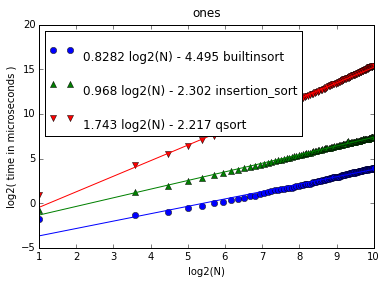

In [22]:

sort_functions = [
    builtinsort,         # see implementation above
    insertion_sort,      # see [[Insertion sort]]
    qsort,               # see [[Quicksort]]
    ]     

import sys
sys.setrecursionlimit(10000)
write_timings(npoints=100, maxN=1024, # 1 <= N <= 2**10 an input sequence length
                 sort_functions=sort_functions,
                 sequence_creators = (ones, range, shuffledrange))
plot_timings()

##Problem 37: Build your own Stack container
A **stack** is a container of elements with *last in, first out* access policy. 
Sometimes it also called **LIFO**. The stack is accessed through its **top**. 
The basic stack operations are:

* **push** stores a new element onto the stack top;
* **pop** returns the last pushed stack element, while removing it from the stack;
* **empty** tests if the stack contains no elements.

Create a stack supporting the basic operations: push, pop, empty.

In [76]:
# First implementation: as a linked-list
    
class Stack:
    
    def __init__(self):
        self._first = None
    
    def __nonzero__(self):
        return self._first is not None 
    
    def push(self, value):
        self._first = (value, self._first)
    
    def pop(self):
        if self._first is None:
            raise IndexError, "pop from empty stack"
        value, self._first = self._first
        return value
    
s = Stack()
s.push('123')
s.push('ABC')
print s.pop()
print s.pop()

ABC
123


In [75]:
#Second implementation: directly as a list

class Stack:
    
    def __init__(self):
         self.container = []  

    def isEmpty(self):
         return self.size() == 0   
        
    def push(self, item):
         self.container.append(item)  

    def pop(self):
         return self.container.pop()  

    def size(self):
         return len(self.container)  

s = Stack()
s.push('123')
s.push('ABC')
print s.pop()
print s.pop()

ABC
123
